## Libraries

- numpy: package for scientific computing 
- matplotlib: 2D plotting library
- tensorflow: open source software library for machine intelligence
- **learn**: Simplified interface for TensorFlow (mimicking Scikit Learn) for Deep Learning
- mse: "mean squared error" as evaluation metric
- **lstm_predictor**: our lstm class 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.contrib import learn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lstm_predictor import generate_data, lstm_model

## Parameter definitions

- LOG_DIR: log file
- TIMESTEPS: RNN time steps
- RNN_LAYERS: RNN layer information
- DENSE_LAYERS: Size of DNN,  [10, 10]: Two dense layer with 10 hidden units
- TRAINING_STEPS
- BATCH_SIZE
- PRINT_STEPS

In [2]:
LOG_DIR = './ops_logs'
TIMESTEPS = 5
RNN_LAYERS = [{'steps': TIMESTEPS}]
DENSE_LAYERS = [10, 10]
TRAINING_STEPS = 100000
BATCH_SIZE = 100
PRINT_STEPS = TRAINING_STEPS / 100

## Generate waveform
 - fct: function
 - x: observation
 - time_steps
 - seperate: check multimodal

In [3]:
X, y = generate_data(np.sin, np.linspace(0, 100, 10000), TIMESTEPS, seperate=False)

## Create a regressor with TF Learn
**Parameters**: 
- model_fn: regression model
- n_classes: 0 for regression
- verbose
- steps: training steps
- optimizer: ("SGD", "Adam", "Adagrad")
- learning_rate
- batch_size

In [4]:
regressor = learn.TensorFlowEstimator(model_fn=lstm_model(TIMESTEPS, RNN_LAYERS, DENSE_LAYERS), 
                                      n_classes=0,
                                      verbose=1,  
                                      steps=TRAINING_STEPS, 
                                      optimizer='Adagrad',
                                      learning_rate=0.03, 
                                      batch_size=BATCH_SIZE)

## ValidationMonitor
 - x
 - y
 - every_n_steps
 - early_stopping_rounds

In [5]:
validation_monitor = learn.monitors.ValidationMonitor(X['val'], y['val'],
                                                      every_n_steps=PRINT_STEPS,
                                                      early_stopping_rounds=1000)

## Train and validation

- fit: fitting using training data

In [6]:
regressor.fit(X['train'], y['train'], monitors=[validation_monitor], logdir=LOG_DIR)

TensorFlowEstimator(steps=100000, optimizer=Adagrad, learning_rate=0.03, batch_size=100, n_classes=0, verbose=1, class_weight=None, continue_training=False, clip_gradients=5.0, params=None)

## Evaluate using test set

Evaluate our hypothesis using test set. The mean squared error (MSE) is used for the evaluation metric.


In [7]:
predicted = regressor.predict(X['test'])
mse = mean_squared_error(y['test'], predicted)
print ("Error: %f" % mse)

Error: 0.000294


## Plotting

Then, plot both predicted values and original values from test set.

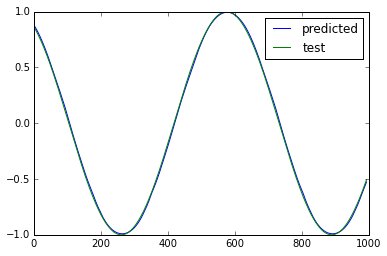

In [8]:
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(y['test'], label='test')
plt.legend(handles=[plot_predicted, plot_test])